In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [36]:
dataset = pd.read_csv('Advertising.csv')

In [37]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [38]:
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


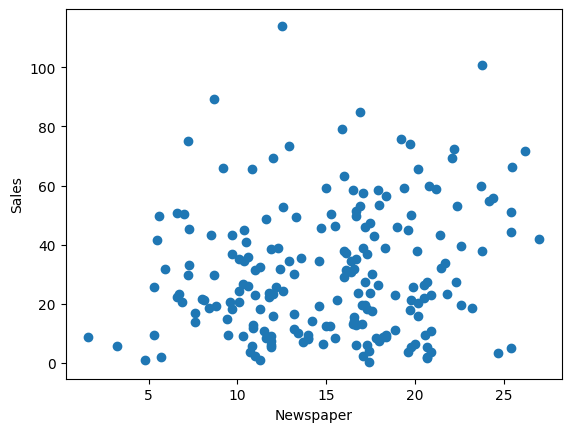

In [39]:
plt.plot(dataset["Sales"],dataset["Newspaper"],'o')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

In [40]:
df=dataset[['Newspaper','Sales']]
df

,Newspaper,Sales
0,69.2,22.1
1,45.1,10.4
2,69.3,12.0
3,58.5,16.5
4,58.4,17.9
...,...,...
195,13.8,7.6
196,8.1,14.0
197,6.4,14.8
198,66.2,25.5


In [41]:
x=dataset.Newspaper
y=dataset.Sales

In [42]:
x.shape

(200,)

In [43]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [44]:
y.shape

(200,)

In [45]:
x=dataset.Newspaper.values.reshape(200,1)
y=dataset.Sales.values.reshape(200,1)

In [46]:
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


In [47]:
#X=np.hstack((np.ones((150,1)),x))
X=np.hstack((x,(np.ones(x.shape))))

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [49]:
X_train=np.hstack((x_train,(np.ones(x_train.shape))))
X_test=np.hstack((x_test,(np.ones(x_test.shape))))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 2)
(40, 2)
(160, 1)
(40, 1)


In [50]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(2,1)
print('Theta:',theta)

Theta: [[1.76405235]
 [0.40015721]]


In [51]:
def model(X, theta):
    return X.dot(theta)

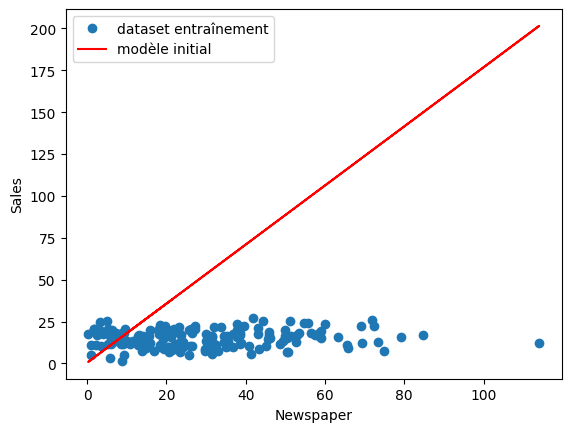

In [52]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta), c='r',label='modèle initial')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [53]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [54]:
cost_function(X_train, y_train, theta)

1389.6353718927037

In [55]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [56]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [57]:
n_iterations = 2000000
learning_rate = 0.00001
theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

In [58]:
cost_history

array([1354.14839344, 1319.59843876, 1285.96076584, ...,   13.5910486 ,
         13.5910486 ,   13.5910486 ])

In [59]:
theta_final

array([[ 0.02496417],
       [14.42904893]])

In [60]:
theta_final[0]

array([0.02496417])

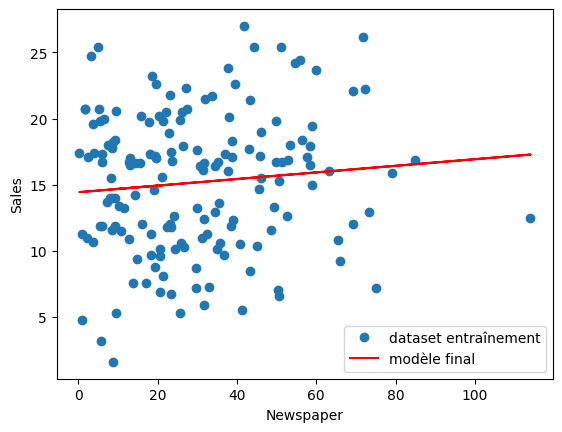

In [61]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta_final), c='r',label='modèle final')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

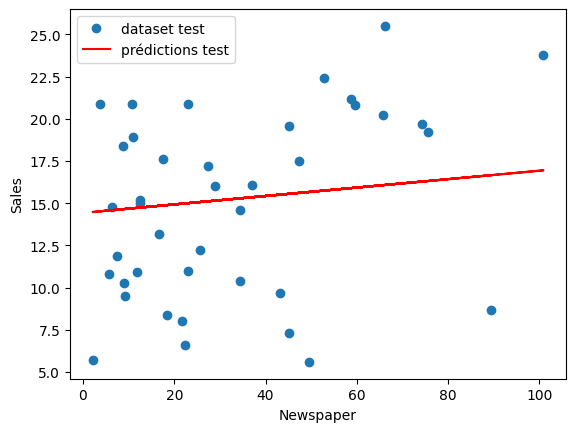

In [62]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X_test, theta_final)

# Affichage des résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.plot(x_test,y_test,'o',label='dataset test')
plt.plot(x_test,predictions , c='r',label='prédictions test')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [63]:
# Test: # prédire quelle serait la largeur d'un pétale qui a une longueur de 2,5 cm
X_2_5= np.array([2.5,1])
pred_y_2_5=model(X_2_5, theta_final) 
print(pred_y_2_5)

[14.49145935]


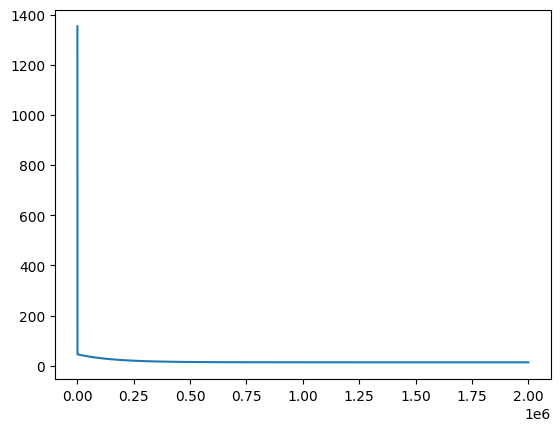

In [64]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [65]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [66]:
coef_determination(y_test, predictions) # predictions=model(X_test,theta_final)

0.06664682589991655

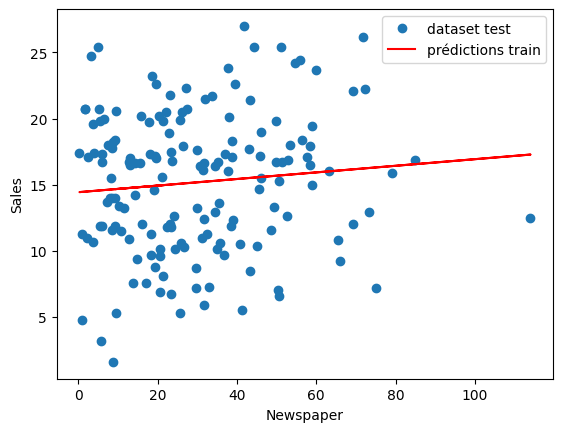

In [67]:
predictions2 = model(X_train , theta_final)
plt.plot(x_train,y_train,'o',label='dataset test')
plt.plot(x_train,predictions2 , c='r',label='prédictions train')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [68]:
coef_determination(y_train, predictions2) # predictions2=model(X_train,theta_final)

0.009378694769935914

In [69]:
# Create a DataFrame with y_test and predictions
combined_data = pd.DataFrame({'y_train': y_train.squeeze(), 'predictions_train': predictions2.squeeze()})

# Calculate correlation matrix
correlation_matrix = combined_data.corr()

# Print correlation matrix
print("\nCorrelation matrix:")
print(correlation_matrix)


Correlation matrix:
                    y_train  predictions_train
y_train            1.000000           0.096873
predictions_train  0.096873           1.000000
